# 1

1.) The difference between simple linear regression and multiple linear regression is the number of predictor variables it takes into account. Simple linear regression looks at how one predictor variable relates to the outcome, while multiple linear regression looks at how multiple predictor variables independently affect the outcome variable. 

2.) A continuous variable is a variable that takes all numerical values. On the other hand, an indicator variable is like a switch that turns on and off depending on the category of the variable. In other words, it represents a categorical characterization, taking on values 0 or 1. The linear form of a simple linear regression would be Y=β 
0​+β 1​X+ϵ. X is continuous here. The model for multiple linear regression is Y=β0​+β1​D+ϵ where D represents an indicator variable that results in either 0 or 1 depending on what categorical variable is represented. 


3.) In multiple linear regression vs simple linear regression, the intercept of the model shifts depending on the categorical variables present. In other words, the model still represents a linear model, but depending on the indicator variable being turned on or off, the intercept shifts. 

4.) The effect of adding an interaction between a continuous and an indicator variable in multiple lienar regression models is being able to have a predictor variable depend on another predictor variable. This allows for the model to show interactions between predictor variables in predicting the outcome variable. The model for this form would be Y=β0​+β1​X+β2​D+β​(X⋅D)+ϵ

5.) The behavior of the multiple linear regression model will change based on which category is used as a reference category. The reference category is the category that will be implicitly represented through the other two categories which utilize an indicator variable. So for example, when representing three categories (red, blue, green), and setting red as the implicity represented variable, you will get the model Y=β0​+β1​DBlue​+β2​DGreen​+ϵ. The binary variable encodings this model utilizes is called one-hot encoding. 

ChaptGPT Link: https://chatgpt.com/share/67365b78-6668-8011-9af4-4fd91dc4625e

https://chatgpt.com/share/67365b99-db8c-8011-9174-eeee26932a7a

# 2

1.) In this situation we want to observe how the sales of sports equipment relate to amount spent on advertising on TV and online platforms. This will make our outcome variable be the amount of sports equipment sales, and our predictor variables the amount spent on TV and online advertising. The model for prediciting the outcome **without** interaction is: Outcome=β0​+β1​(TV)+β2​(Online)+ϵ. The model for predicting the outcome **with** interaction is: Sales=β0​+β1​(TV)+β2​(Online)+β3​(TV×Online)+ϵ. The model without interaction predicts how TV and Online advertising independently affect how much sales are made. The model with interaction takes into consideration how TV advertising and online spending can change depending on the amount of spending for each one. 

2.) We can use an indicator variable for TV(high) and Online(high). In other words, this variable will evaluate to 1 if it is characterized as high spending for either TV or Online advertising. The formula would be changed to this: Sales=β0​+β1​(TV high​)+β2​(Online high​)+ϵ 

ChaptGPT Link: https://chatgpt.com/share/67365bbc-9c78-8011-b854-f427b387dfae

# 3 

In [17]:
import pandas as pd
import statsmodels.formula.api as smf

# Load the dataset
cscs = pd.read_csv('CSCS_data_anon.csv', dtype='string', low_memory=False)

# Drop rows with missing values only in relevant columns
required_columns = ['LONELY_ucla_loneliness_scale_isolated', 'CONNECTION_social_num_close_friends', 'CONNECTION_activities_hug_p3m']
cscs = cscs.dropna(subset=required_columns)

# Check if cscs is empty after dropping rows
if cscs.empty:
    raise ValueError("The dataset is still empty after selective dropping of rows with missing values.")

# Create the 'isolation' column as a binary variable (1 if 'Often', 0 otherwise)
cscs['isolation'] = (cscs['LONELY_ucla_loneliness_scale_isolated'] == 'Often').astype(int)

# Convert CONNECTION_social_num_close_friends to numeric
cscs['CONNECTION_social_num_close_friends'] = pd.to_numeric(cscs['CONNECTION_social_num_close_friends'], errors='coerce')

# Create dummy variables for CONNECTION_activities_hug_p3m and clean up column names
hug_dummies = pd.get_dummies(cscs['CONNECTION_activities_hug_p3m'], prefix='hug', drop_first=True)

# Rename columns to remove spaces and special characters
hug_dummies.columns = hug_dummies.columns.str.replace(r'\W', '_', regex=True)

# Add the dummy variables to the DataFrame
cscs = pd.concat([cscs, hug_dummies], axis=1)

# Ensure all relevant columns are of standard numeric types
cscs['isolation'] = cscs['isolation'].astype(int)
cscs['CONNECTION_social_num_close_friends'] = cscs['CONNECTION_social_num_close_friends'].astype(float)

# Define the logistic regression formula including dummy variables as predictors
linear_model_specification_formula = (
    'isolation ~ CONNECTION_social_num_close_friends + ' +
    ' + '.join(hug_dummies.columns)
)

# Fit the logistic regression model
try:
    log_reg_fit = smf.logit(linear_model_specification_formula, data=cscs).fit(maxiter=100)
    print(log_reg_fit.summary())
except ValueError as e:
    print(f"Error fitting the model: {e}")


Optimization terminated successfully.
         Current function value: 0.487482
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              isolation   No. Observations:                  807
Model:                          Logit   Df Residuals:                      798
Method:                           MLE   Df Model:                            8
Date:                Thu, 14 Nov 2024   Pseudo R-squ.:                 0.09451
Time:                        20:33:23   Log-Likelihood:                -393.40
converged:                       True   LL-Null:                       -434.46
Covariance Type:            nonrobust   LLR p-value:                 1.829e-14
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -0.6

Optimization terminated successfully.
         Current function value: 0.501925
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.501778
         Iterations 7


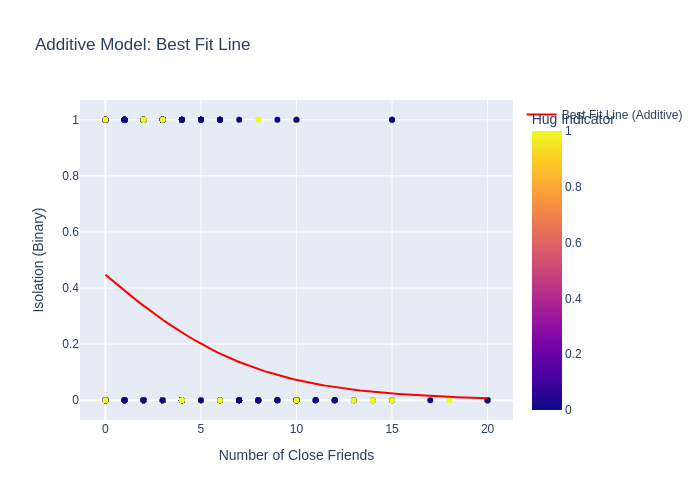

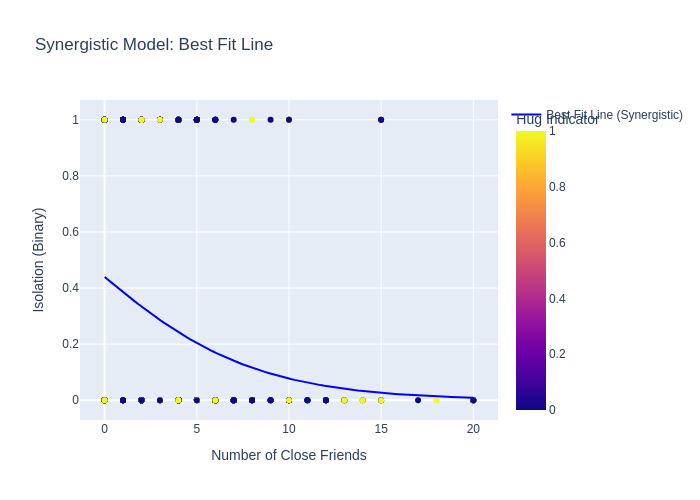

In [23]:
import pandas as pd
import plotly.express as px
import statsmodels.formula.api as smf
import numpy as np

# Assuming you have a dataframe `cscs` and necessary columns

# Create the 'isolation' binary column as a binary variable (1 if 'Often', 0 otherwise)
cscs['isolation'] = (cscs['LONELY_ucla_loneliness_scale_isolated'] == 'Often').astype(int)

# Convert 'CONNECTION_social_num_close_friends' to numeric, handling non-numeric values
cscs['CONNECTION_social_num_close_friends'] = pd.to_numeric(cscs['CONNECTION_social_num_close_friends'], errors='coerce')

# Create binary indicator from 'CONNECTION_activities_hug_p3m' (adjust depending on your need)
hug_indicator = (cscs['CONNECTION_activities_hug_p3m'] == 'Daily or almost daily').astype(int)
cscs['hug_indicator'] = hug_indicator

# Fit the additive model (continuous + binary indicator)
additive_model = smf.logit('isolation ~ CONNECTION_social_num_close_friends + hug_indicator', data=cscs).fit()

# Fit the synergistic model (continuous + binary indicator + interaction term)
synergistic_model = smf.logit('isolation ~ CONNECTION_social_num_close_friends * hug_indicator', data=cscs).fit()

# Generate a smooth sequence of 'x' values for plotting (from min to max of the 'CONNECTION_social_num_close_friends')
x_vals = np.linspace(cscs['CONNECTION_social_num_close_friends'].min(), 
                     cscs['CONNECTION_social_num_close_friends'].max(), 
                     100)

# Create a DataFrame with these values and corresponding hug indicator (assuming 0 or 1, you can modify as needed)
hug_indicator_vals = np.zeros_like(x_vals)  # Adjust this if you want to plot with different hug_indicator values
x_vals_df = pd.DataFrame({'CONNECTION_social_num_close_friends': x_vals, 'hug_indicator': hug_indicator_vals})

# Generate predictions for the additive model using the smooth x_vals
x_vals_df['additive_pred'] = additive_model.predict(x_vals_df)

# Generate predictions for the synergistic model using the smooth x_vals
x_vals_df['synergistic_pred'] = synergistic_model.predict(x_vals_df)

# Plot the additive model (with points and best fit line)
fig_additive = px.scatter(cscs, x='CONNECTION_social_num_close_friends', y='isolation',
                          color='hug_indicator', title='Additive Model: Best Fit Line',
                          labels={'CONNECTION_social_num_close_friends': 'Number of Close Friends',
                                  'isolation': 'Isolation (Binary)', 'hug_indicator': 'Hug Indicator'})

# Add the smooth best fit line for the additive model
fig_additive.add_scatter(x=x_vals_df['CONNECTION_social_num_close_friends'], 
                         y=x_vals_df['additive_pred'], mode='lines', name='Best Fit Line (Additive)', line=dict(color='red'))

# Plot the synergistic model (with points and best fit line)
fig_synergistic = px.scatter(cscs, x='CONNECTION_social_num_close_friends', y='isolation',
                             color='hug_indicator', title='Synergistic Model: Best Fit Line',
                             labels={'CONNECTION_social_num_close_friends': 'Number of Close Friends',
                                     'isolation': 'Isolation (Binary)', 'hug_indicator': 'Hug Indicator'})

# Add the smooth best fit line for the synergistic model
fig_synergistic.add_scatter(x=x_vals_df['CONNECTION_social_num_close_friends'], 
                            y=x_vals_df['synergistic_pred'], mode='lines', name='Best Fit Line (Synergistic)', line=dict(color='blue'))

# Show the plots
fig_additive.show(renderer = "png")
fig_synergistic.show(renderer = "png")


This model predicts whether an individual is isolated (binary variable) using the number of close friends (continuous variable) and the categories of how often someone is hugged using indicator variables. To make predictions using this formula, you would plug in coefficients from the fitted model into the logistic model, which will output the probability of someone feeling isolated. 

Since the p-value is very far from a significance level of 0.05 for number of close friends, hugging a few times a week, hugging monthly, and not hugging in the past three months, all of these predictor variables are significant in predicting whether an individual is lonely or not. 

ChaptGPT Link: https://chatgpt.com/share/67365cce-33b8-8011-b241-af04b944d851

# 4

In [17]:
import pandas as pd

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
# fail https://github.com/KeithGalli/pandas/blob/master/pokemon_data.csv
pokeaman = pd.read_csv(url) 
pokeaman
import statsmodels.formula.api as smf

model1_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation) + Q("Sp. Def"):C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") * C(Generation)', data=pokeaman)

model2_fit = model2_spec.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     15.27
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           3.50e-27
Time:                        22:11:13   Log-Likelihood:                -3649.4
No. Observations:                 800   AIC:                             7323.
Df Residuals:                     788   BIC:                             7379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          26.8971      5.246      5.127      0.000      16.599      37.195
C(Generation)[T.2]                 20.0449      7.821      2.563      0.011       4.692      35.398
C(Generation)[T.3]                 21.3662      6.998      3.053      0.002       7.629      35.103
C(Generation)[T.4]                 31.9575      8.235      3.881      0.000      15.793      48.122
C(Generation)[T.5]                  9.4926      7.883      1.204      0.229      -5.982      24.968
C(Generation)[T.6]                 22.2693      8.709      2.557      0.011       5.173      39.366
Q("Sp. Def")                        0.5634      0.071      7.906      0.000       0.423       0.703
Q("Sp. Def"):C(Generation)[T.2]    -0.2350      0.101     -2.316      0.021      -0.434      -0.036
Q("Sp. Def"):C(Generation)[T.3]    -0.3067      0.093     -3.300      0.001      -0.489      -0.124
Q("Sp. Def"):C(Generation)[T.4]    -0.3790      0.105     -3.600      0.000      -0.586      -0.172
Q("Sp. Def"):C(Generation)[T.5]    -0.0484      0.108     -0.447      0.655      -0.261       0.164
Q("Sp. Def"):C(Generation)[T.6]    -0.3083      0.112     -2.756      0.006      -0.528      -0.089
==============================================================================
Omnibus:                      337.229   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2871.522
Skew:                           1.684   Prob(JB):                         0.00
Kurtosis:                      11.649   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The contradiction arises from looking at the R^2 value and the p-value. Interpreting R^2 in this context allows us to see that the model explains 17.6% of the variability in the outcome, which is a small amount. However, the individual predictors can be statistically significant at the same time, meaning it has a very low p-value. This, alongside having a larger coefficient, can show that these individual predictors have a strong effect in predicting the outcome. Overall, the model does not explain the variability in the outcome very well, its individual predictors are statistically significant in prediciting the outcome. 

# 5 

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split

fifty_fifty_split_size = int(pokeaman.shape[0]*0.5)

# Replace "NaN" (in the "Type 2" column with "None")
pokeaman.fillna('None', inplace=True)

np.random.seed(130)
pokeaman_train,pokeaman_test = \
  train_test_split(pokeaman, train_size=fifty_fifty_split_size)
pokeaman_train
model_spec3 = smf.ols(formula='HP ~ Attack + Defense', 
                      data=pokeaman_train)
model3_fit = model_spec3.fit()
model3_fit.summary()
yhat_model3 = model3_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model3_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model3)[0,1]**2)
model4_linear_form = 'HP ~ Attack * Defense * Speed * Legendary'
model4_linear_form += ' * Q("Sp. Def") * Q("Sp. Atk")'
# DO NOT try adding '* C(Generation) * C(Q("Type 1")) * C(Q("Type 2"))'
# That's 6*18*19 = 6*18*19 possible interaction combinations...
# ...a huge number that will blow up your computer

model4_spec = smf.ols(formula=model4_linear_form, data=pokeaman_train)
model4_fit = model4_spec.fit()
model4_fit.summary()
yhat_model4 = model4_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model4_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model4)[0,1]**2)

'In sample' R-squared:     0.14771558304519894
'Out of sample' R-squared: 0.21208501873920738
'In sample' R-squared:     0.46709442115833855
'Out of sample' R-squared: 0.002485342598992873


These cells are illustrating how to fit and evaluate linear regression models on the dataset and demonstrates the difference in performance of in-sample and out-of-sample R-squared. Firstly, the data is split into "training" and "testing" datasets. The "training" dataset is used to fit the models, whereas the "testing" dataset is used to later evaluate how well the model predicts the outcome. Model 3 is a simple linear regression of HP as the predicted outcome and Attack and Defense as the predictive variables. Then, Model 3's performance is evaluated for both "in sample" and "out of sample" R-squared. Model 4 is a more complex model than Model 3, taking into account Attack, Defense, Speed, and Legendary, and how thse variables interact with eachother to predict HP. Model 4 is fitted using the "training" data as Model 3 was, and then it is evaluated for its "in sample" R-squared and "out of sample" R-squared values. 

# 6 

In [20]:
# "Cond. No." WAS 343.0 WITHOUT to centering and scaling
model3_fit.summary() 
from patsy import center, scale

model3_linear_form_center_scale = \
  'HP ~ scale(center(Attack)) + scale(center(Defense))' 
model_spec3_center_scale = smf.ols(formula=model3_linear_form_center_scale,
                                   data=pokeaman_train)
model3_center_scale_fit = model_spec3_center_scale.fit()
model3_center_scale_fit.summary()
# "Cond. No." is NOW 1.66 due to centering and scaling
model4_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Defense))'
model4_linear_form_CS += ' * scale(center(Speed)) * Legendary' 
model4_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# Legendary is an indicator, so we don't center and scale that

model4_CS_spec = smf.ols(formula=model4_linear_form_CS, data=pokeaman_train)
model4_CS_fit = model4_CS_spec.fit()
model4_CS_fit.summary().tables[-1]  # Cond. No. is 2,250,000,000,000,000

# The condition number is still bad even after centering and scaling
# Just as the condition number was very bad to start with
model4_fit.summary().tables[-1]  # Cond. No. is 12,000,000,000,000,000

Omnibus:,214.307,Durbin-Watson:,1.992
Prob(Omnibus):,0.000,Jarque-Bera (JB):,2354.664
Skew:,2.026,Prob(JB):,0.00
Kurtosis:,14.174,Cond. No.,1.20e+16


The model4_linear_form creates new predictor variables, as when you combine two predictor variables (by multiplying them, creating interaction terms), these values are treated as new predictor variables. Multicollinearity happens when predictor variables are highly correlated with eachother, which makes it harder to separate the individual effects. Since we are including interaction terms in this model, it can increase the chances of these variables being correlated, which is manifested in a high condition number: small changes in the data can drastically change the outcome. This means that the model is not completely able to accurately make predictions on new, "out of sample," data. 

# 7 

In [21]:
# Here's something a little more reasonable...
model5_linear_form = 'HP ~ Attack + Defense + Speed + Legendary'
model5_linear_form += ' + Q("Sp. Def") + Q("Sp. Atk")'
model5_linear_form += ' + C(Generation) + C(Q("Type 1")) + C(Q("Type 2"))'

model5_spec = smf.ols(formula=model5_linear_form, data=pokeaman_train)
model5_fit = model5_spec.fit()
model5_fit.summary()
yhat_model5 = model5_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model5_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model5)[0,1]**2)
# Here's something a little more reasonable...
model6_linear_form = 'HP ~ Attack + Speed + Q("Sp. Def") + Q("Sp. Atk")'
# And here we'll add the significant indicators from the previous model
# https://chatgpt.com/share/81ab88df-4f07-49f9-a44a-de0cfd89c67c
model6_linear_form += ' + I(Q("Type 1")=="Normal")'
model6_linear_form += ' + I(Q("Type 1")=="Water")'
model6_linear_form += ' + I(Generation==2)'
model6_linear_form += ' + I(Generation==5)'

model6_spec = smf.ols(formula=model6_linear_form, data=pokeaman_train)
model6_fit = model6_spec.fit()
model6_fit.summary()
yhat_model6 = model6_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model6_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2)
# And here's a slight change that seems to perhaps improve prediction...
model7_linear_form = 'HP ~ Attack * Speed * Q("Sp. Def") * Q("Sp. Atk")'
model7_linear_form += ' + I(Q("Type 1")=="Normal")'
model7_linear_form += ' + I(Q("Type 1")=="Water")'
model7_linear_form += ' + I(Generation==2)'
model7_linear_form += ' + I(Generation==5)'

model7_spec = smf.ols(formula=model7_linear_form, data=pokeaman_train)
model7_fit = model7_spec.fit()
model7_fit.summary()
yhat_model7 = model7_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model7_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2)
# And here's a slight change that seems to perhas improve prediction...
model7_linear_form_CS = 'HP ~ scale(center(Attack)) * scale(center(Speed))'
model7_linear_form_CS += ' * scale(center(Q("Sp. Def"))) * scale(center(Q("Sp. Atk")))'
# We DO NOT center and scale indicator variables
model7_linear_form_CS += ' + I(Q("Type 1")=="Normal")'
model7_linear_form_CS += ' + I(Q("Type 1")=="Water")'
model7_linear_form_CS += ' + I(Generation==2)'
model7_linear_form_CS += ' + I(Generation==5)'

model7_CS_spec = smf.ols(formula=model7_linear_form_CS, data=pokeaman_train)
model7_CS_fit = model7_CS_spec.fit()
model7_CS_fit.summary().tables[-1] 
# "Cond. No." is NOW 15.4 due to centering and scaling
# "Cond. No." WAS 2,340,000,000 WITHOUT to centering and scaling
model7_fit.summary().tables[-1]

'In sample' R-squared:     0.3920134083531893
'Out of sample' R-squared: 0.30015614488652215
'In sample' R-squared:     0.3326310334310908
'Out of sample' R-squared: 0.29572460427079933
'In sample' R-squared:     0.37818209127432456
'Out of sample' R-squared: 0.35055389205977444


Omnibus:,252.300,Durbin-Watson:,1.953
Prob(Omnibus):,0.000,Jarque-Bera (JB):,3474.611
Skew:,2.438,Prob(JB):,0.00
Kurtosis:,16.590,Cond. No.,2.34e+09


model5_linear_form is extended from model3_linear_form by adding on more predictor variables and categorical variables to the original model3 model. More specifically, the Speed and Legendary variables are added, alongside the categorial variables Generation and Type 1/Type 2. 

model6_linear_form is extended from model5_linear_form by utilizing specific indicator variables. For example, I(Q("Type 1")=="Normal") and I(Q("Type 1")=="Water") is used, which can be helpful in focusing how specific types of pokemon can predict HP level. Similarly, the indicator variable is used for Generation 2 and Generation 5, which can also show us whether Generation 2 and Generation 5 specifically can predict the HP. This overall makes the model easier to interpret. 

model7_linear_form is extended from model6_linear_form by adding interaction terms between the predictor variables. This way, the model is able to account for how the predictor variables may interact with one another, rather than just focusing on their independent effects. More specifically, this model focuses on the interactions between Attack, Speed, Sp. Def, and Sp. Attack. In this manner we are able to see the non-linear interactions between these variables. 

Finally, model7CS_linear_form is finalized from model7_linear form by centering and scaling the continuous variables from model7, which reduces issues like multicollinearity. 



# 8 

In [27]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

def evaluate_model_performance(data, formula, train_size=0.8, reps=100, random_state=None):
    """
    Evaluate the in-sample and out-of-sample performance of a linear regression model.

    Parameters:
    - data: The dataset (pandas DataFrame).
    - formula: The formula for the linear model (string).
    - train_size: The proportion of data to use for training (default 0.8).
    - reps: The number of repetitions for model evaluation (default 100).
    - random_state: The seed for random number generator (default None).

    Returns:
    - fig: A Plotly figure object showing the performance comparison.
    - results_df: A DataFrame containing the in-sample and out-of-sample R-squared values.
    """
    
    # Initialize arrays to store R-squared values
    in_sample_Rsquared = np.zeros(reps)
    out_of_sample_Rsquared = np.zeros(reps)

    # Set the random seed for reproducibility (if provided)
    np.random.seed(random_state)

    # Loop for the specified number of repetitions
    for i in range(reps):
        # Train-test split
        train_data, test_data = train_test_split(data, train_size=train_size)

        # Fit the model using the formula
        model = smf.ols(formula=formula, data=train_data).fit()

        # Calculate in-sample R-squared
        in_sample_Rsquared[i] = model.rsquared

        # Calculate out-of-sample R-squared using correlation between actual and predicted values
        out_of_sample_Rsquared[i] = np.corrcoef(test_data[model.endog_names], model.predict(test_data))[0, 1]**2

    # Store results in a DataFrame
    results_df = pd.DataFrame({
        "In Sample Performance (Rsquared)": in_sample_Rsquared,
        "Out of Sample Performance (Rsquared)": out_of_sample_Rsquared
    })

    # Create a scatter plot to visualize performance
    fig = px.scatter(results_df, x="In Sample Performance (Rsquared)", 
                     y="Out of Sample Performance (Rsquared)", 
                     title="In-Sample vs Out-of-Sample R-Squared", 
                     labels={"In Sample Performance (Rsquared)": "In-Sample R-Squared", 
                             "Out of Sample Performance (Rsquared)": "Out-of-Sample R-Squared"})

    # Add the line y=x for reference
    fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], name="y=x", line_shape='linear', line=dict(dash='dash', color='red')))

    # Show the plot
    fig.show()

    return fig, results_df


The purpose of this is to assess the ability of the model to be generalized to other new data sets. In other words, we are assessing how consistent the model is when used on different subsets of the data, ensuring that our model is actually making accurate predictions and is not making accurate predictions purely due to chance. It also shows the variablity of the model. The results would be displayed as a scatterplot with two axes, one for how well the model explains the variation for the training data, and one for the testing data. If all of the points are close to y = x, this means that the R^2 values for the in-sample and out of sample are about the same, meaning that the model generalizes well. 

# 9 

In [28]:
 model7_gen1_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model7_gen1_predict_future_fit = model7_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model7_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")
model7_gen1to5_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model7_gen1to5_predict_future_fit = model7_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model7_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")
model6_gen1_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model6_gen1_predict_future_fit = model6_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model6_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")
model6_gen1to5_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model6_gen1to5_predict_future_fit = model6_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model6_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

'In sample' R-squared:     0.37818209127432456 (original)
'Out of sample' R-squared: 0.35055389205977444 (original)
'In sample' R-squared:     0.5726118179916575 (gen1_predict_future)
'Out of sample' R-squared: 0.11151363354803218 (gen1_predict_future)
'In sample' R-squared:     0.37818209127432456 (original)
'Out of sample' R-squared: 0.35055389205977444 (original)
'In sample' R-squared:     0.3904756578094535 (gen1to5_predict_future)
'Out of sample' R-squared: 0.23394915464343125 (gen1to5_predict_future)
'In sample' R-squared:     0.3326310334310908 (original)
'Out of sample' R-squared: 0.29572460427079933 (original)
'In sample' R-squared:     0.4433880517727282 (gen1_predict_future)
'Out of sample' R-squared: 0.1932858534276128 (gen1_predict_future)
'In sample' R-squared:     0.3326310334310908 (original)
'Out of sample' R-squared: 0.29572460427079933 (original)
'In sample' R-squared:     0.33517279824114776 (gen1to5_predict_future)
'Out of sample' R-squared: 0.26262690178799936 (ge

This code is performing several different model evaluations. More specifically, it tests how well the models trained on specific generations can be generalized for other generations to predict HP. They are each evaluated for their "in-sample" and "out of sample" variations. Overall, the code above tests each model's ability to generalize to future unseen data, in this case, to different generations.

ChatGPT link for Q4-9: https://chatgpt.com/share/67353295-019c-8011-803c-95e4becbf80e